<font size="+5">#04. Comparacion de Modelos: Arboles de Decision vs Support Vector Machines vs Regresion Logistica</font>

<ul>
    <li>Resolver dudas → Pregunta en <img src="https://discord.com/assets/f9bb9c4af2b9c32a2c5ee0014661546d.png" style="height: 1em; vertical-align: middle;"> <a href="https://discord.gg/cmB3KGsqMy">Discord</a></li>
    <li>Tutoriales → <img src="https://openmoji.org/php/download_asset.php?type=emoji&emoji_hexcode=E044&emoji_variant=color" style="height: 1em; vertical-align: middle;"> <a href="https://www.youtube.com/channel/UCovCte2I3loteQE_kRsfQcw">YouTube</a></li>
    <li>Reservar Clases → <span style="color: orange">@</span> <a href="https://sotastica.com/reservar">sotastica</a></li>
</ul>

# Cargar Datos

> Copiamos y pegamos en una celda las siguientes líneas de código para cargar una tabla de datos que contiene información de personas que han solicitado tarjetas de crédito. La variable objetivo se sitúa en la columna `target` y nos cuenta si una persona ha sido apta para la tarjeta o no...

```python
import pandas as pd

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/crx.data',
                 na_values='?', header=None)

df.rename(columns={15: 'target'}, inplace=True)
df.head()
```

In [15]:
import pandas as pd

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/crx.data',
                 na_values='?', header=None)

df.rename(columns={15: 'target'}, inplace=True)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,target
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,+


# Seleccionar Variables

> Vamos a tener en cuenta todas las variables para el modelo. Por tanto, deberéis hacer las transformaciones pertinentes para que el modelo pueda tener en cuenta todas las variables (ya sean numéricas o categóricas).
>
> - `Variable Objetivo y`
> - `Variables Explicativas X`

In [16]:
df = pd.get_dummies(df,drop_first=True).dropna()
df

,1,2,7,10,13,14,0_b,3_u,3_y,4_gg,...,6_n,6_o,6_v,6_z,8_t,9_t,11_t,12_p,12_s,target_-
0,30.83,0.000,1.25,1,202.0,0,1,1,0,0,...,0,0,1,0,1,1,0,0,0,0
1,58.67,4.460,3.04,6,43.0,560,0,1,0,0,...,0,0,0,0,1,1,0,0,0,0
2,24.50,0.500,1.50,0,280.0,824,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
3,27.83,1.540,3.75,5,100.0,3,1,1,0,0,...,0,0,1,0,1,1,1,0,0,0
4,20.17,5.625,1.71,0,120.0,0,1,1,0,0,...,0,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,21.08,10.085,1.25,0,260.0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
686,22.67,0.750,2.00,2,200.0,394,0,1,0,0,...,0,0,1,0,0,1,1,0,0,1
687,25.25,13.500,2.00,1,200.0,1,0,0,1,0,...,0,0,0,0,0,1,1,0,0,1
688,17.92,0.205,0.04,0,280.0,750,1,1,0,0,...,0,0,1,0,0,0,0,0,0,1


In [17]:
target = df['target_-']
explanatory = df.drop(columns='target_-')

# Entrenar Modelo `DecisionTreeClassifier()`

> - Posteriormente, guardar predicciones en `predicciones_dt`.

In [18]:
from sklearn.tree import DecisionTreeClassifier

In [19]:
model = DecisionTreeClassifier()

In [20]:
model.fit(X= explanatory,y= target )

DecisionTreeClassifier()

In [21]:
from sklearn import tree
import matplotlib.pyplot as plt

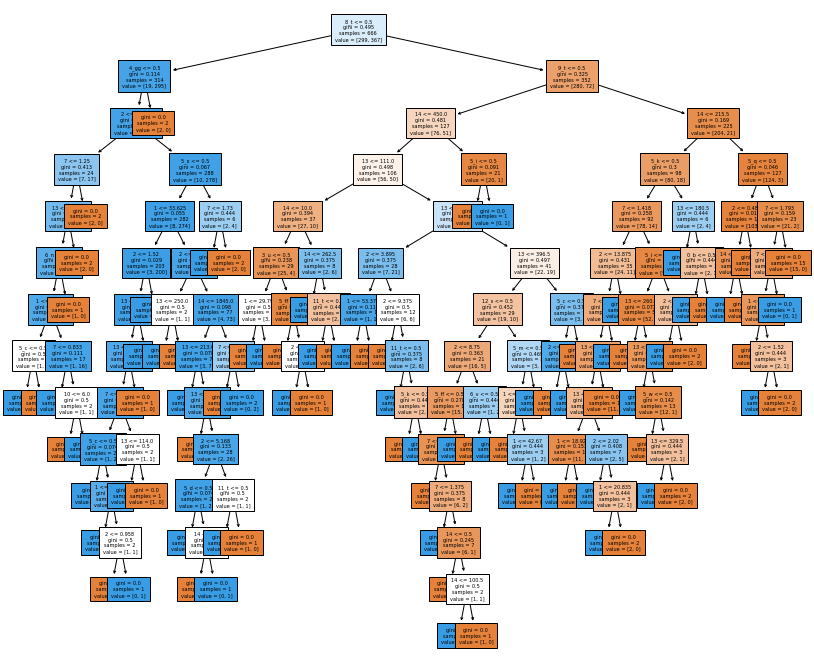

In [22]:
plt.figure(figsize=(14,12))
tree.plot_tree(decision_tree=model, fontsize=5, feature_names=explanatory.columns, filled=True);

In [24]:
predicciones_dt = model.score(X=explanatory, y= target)
predicciones_dt

1.0

# Entrenar Modelo `RandomForestClassifier()`

> _Durante la corrección te explicare en detalle el funcionamiento de este algoritmo. Mientras tanto, podéis ver el vídeo que usaré para que os relacionéis con los conceptos:_
>
> - https://www.youtube.com/watch?v=J4Wdy0Wc_xQ
>
> - Posteriormente, guardar predicciones en `predicciones_rf`.

In [25]:
from sklearn.ensemble import RandomForestClassifier

In [26]:
model = RandomForestClassifier()

In [27]:
model.fit(X = explanatory, y = target)


RandomForestClassifier()

In [28]:
predicciones_rf = model.score(X=explanatory, y=target)
predicciones_rf

1.0

# Entrenar Modelo `KNeighborsClassifier()`

> _Durante la corrección te explicare en detalle el funcionamiento de este algoritmo. Mientras tanto, podéis ver el vídeo que usaré para que os relacionéis con los conceptos:_
>
> - https://www.youtube.com/watch?v=HVXime0nQeI
>
> - Posteriormente, guardar predicciones en `predicciones_kn`.

In [29]:
from sklearn.neighbors import KNeighborsClassifier

In [30]:
model = KNeighborsClassifier()

In [31]:
model.fit(X=explanatory, y=target)

KNeighborsClassifier()

In [32]:
predicciones_kn = model.score(X=explanatory, y=target)
predicciones_kn

0.7837837837837838

# Cuál es el Mejor Modelo?

> - Comparar la precisión de los distintos modelos. Podemos usar la funicón `accuracy_score()`.

In [33]:
from sklearn.metrics import accuracy_score

In [38]:
predicciones_kn

0.7837837837837838

In [39]:
target

0      0
1      0
2      0
3      0
4      0
      ..
685    1
686    1
687    1
688    1
689    1
Name: target_-, Length: 666, dtype: uint8

In [40]:
predicciones_kn

0.7837837837837838

In [36]:
accuracy_score(y_true=target, y_pred=predicciones_kn)

TypeError: Singleton array 0.7837837837837838 cannot be considered a valid collection.

# Separar Datos en Train & Test

> - Usar la función `train_test_split()`.

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
X_train, X_test, y_train, y_test = train_test_split(explanatory, target, test_size=0.3, random_state=42)

# Modelo `DecisionTreeClassifier()`

> - Entrenar modelo con `dt.fit(X_train, y_train)`.
> - Posteriormente, guardar predicciones en `predicciones_dt`, calculadas con la función `dt.predict(x_test)`.

# Modelo `RandomForestClassifier()`

> - Entrenar modelo con `rf.fit(X_train, y_train)`.
> - Posteriormente, guardar predicciones en `predicciones_rf`, calculadas con la función `rf.predict(X_test)`.

# Modelo `KNeighborsClassifier()`

> - Entrenar modelo con `kn.fit(X_train, y_train)`.
> - Posteriormente, guardar predicciones en `predicciones_kn`, calculadas con la función `kn.predict(X_test)`.

# Cuál es el Mejor Modelo?

> - Comparar la precisión de los distintos modelos. Podemos usar la funicón `accuracy_score()`.

# Objetivos Alcanzados

_Haz doble click sobre esta celda y pon una `X` dentro de las casillas [X] si crees que has superado los objetivos:_

- [ ] Entender la necesidad de **crear funciones** para evitar la repetición de código.
- [ ] **Bootstrapping** como forma de repetir datos para crear otro dataset.
- [ ] **Umbral de clasificación** al predecir probabilidades.
- [ ] Distinguir diferentes formas de **comparar modelos** de clasificación.
- [ ] Entender la importancia de comprobar lo bueno que es un modelo con **datos que no han sido usados durante el entrenamiento**.